In [1]:
import pandas as pd
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

In [5]:
wine_df=pd.read_csv('train.csv',index_col=0)

In [6]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,8.0,0.50,0.39,2.20,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,9.3,0.30,0.73,2.30,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,7.1,0.51,0.03,2.10,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,8.1,0.87,0.22,2.60,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,8.5,0.36,0.30,2.30,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2051,6.6,0.31,0.13,2.00,0.056,29.0,42.0,0.99388,3.52,0.87,12.0,7
2052,9.7,0.59,0.21,1.80,0.079,27.0,65.0,0.99745,3.14,0.58,9.4,5
2053,7.7,0.43,0.42,1.70,0.071,19.0,37.0,0.99258,3.32,0.77,12.5,8


In [7]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2056 non-null   float64
 1   volatile acidity      2056 non-null   float64
 2   citric acid           2056 non-null   float64
 3   residual sugar        2056 non-null   float64
 4   chlorides             2056 non-null   float64
 5   free sulfur dioxide   2056 non-null   float64
 6   total sulfur dioxide  2056 non-null   float64
 7   density               2056 non-null   float64
 8   pH                    2056 non-null   float64
 9   sulphates             2056 non-null   float64
 10  alcohol               2056 non-null   float64
 11  quality               2056 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 208.8 KB


In [8]:
X=wine_df.drop('quality',axis=1)

In [9]:
y=wine_df['quality']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23,stratify=y)

In [21]:
kfold=KFold(n_splits=5,shuffle=True,random_state=23)

In [25]:
dtc=DecisionTreeClassifier(random_state=23,max_depth=2)

In [26]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 23,
 'splitter': 'best'}

In [27]:
params={'max_depth':[2,3,4,5,6,None],'min_samples_leaf':[1,3,5,7,10,15],'min_samples_split': [2,5,10]}

In [28]:
gcv=GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss')

In [29]:
gcv.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=2, random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 3, 5, 7, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_log_loss')

In [30]:
gcv.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [31]:
gcv.best_score_

-1.0877347918198406

In [32]:
best_model=gcv.best_estimator_
best_model

DecisionTreeClassifier(max_depth=2, random_state=23)

In [33]:
df_imp=pd.DataFrame({'variable':best_model.feature_names_in_ ,'importance':best_model.feature_importances_})
df_imp

,variable,importance
0,fixed acidity,0.000000
1,volatile acidity,0.000000
2,citric acid,0.000000
3,residual sugar,0.000000
4,chlorides,0.000000
5,free sulfur dioxide,0.000000
6,total sulfur dioxide,0.000000
7,density,0.000000
8,pH,0.000000
9,sulphates,0.336273


In [34]:
df_imp=df_imp[df_imp['importance']>0.0001]
df_imp=df_imp.sort_values(by="importance")
df_imp

,variable,importance
9,sulphates,0.336273
10,alcohol,0.663727


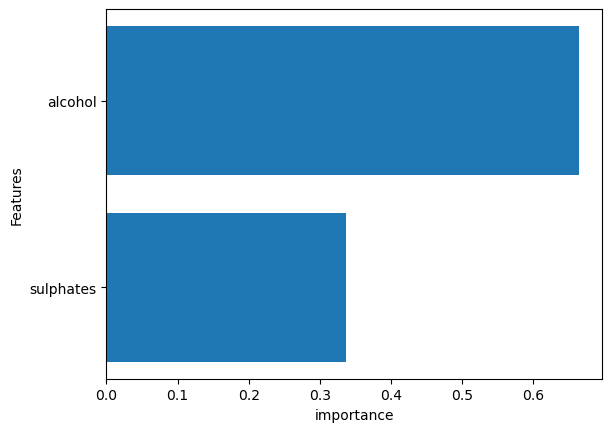

In [35]:
plt.barh(df_imp['variable'],df_imp['importance'])
plt.xlabel("importance")
plt.ylabel('Features')
plt.show()

In [40]:
test_df=pd.read_csv('test.csv',index_col=0)

In [41]:
test_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Id,,,,,,,,,,,
2056,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
2057,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0
2058,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5
2059,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7
2060,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,3.23,0.48,12.8
...,...,...,...,...,...,...,...,...,...,...,...
3423,8.8,0.745,0.18,2.7,0.084,41.0,115.0,0.99823,3.38,0.70,9.8
3424,15.6,0.240,0.55,2.9,0.062,11.0,25.0,0.99724,2.99,0.77,10.1
3425,7.3,0.760,0.00,2.2,0.095,6.0,19.0,0.99880,3.67,0.60,9.4


In [42]:
y_pred=gcv.predict(test_df)

In [43]:
y_pred

array([5, 6, 6, ..., 5, 5, 6])

In [47]:
sample_submission_df=pd.read_csv('sample_submission.csv',index_col=0)

In [49]:
sample_submission_df['quality']=y_pred

In [50]:
sample_submission_df

,quality
Id,
2056,5
2057,6
2058,6
2059,6
2060,6
...,...
3423,6
3424,6
3425,5


In [53]:
sample_submission_df.to_csv('sample_submission.csv')